In [19]:
import pandas as pd 
import numpy as np
from pathlib import Path

import warnings 
warnings.filterwarnings('ignore')

DATA_DIR = Path('./data/input')

train = pd.read_csv(DATA_DIR / 'train.csv')
test = pd.read_csv(DATA_DIR / 'test.csv')
info = pd.read_csv(DATA_DIR / 'info.csv')
network = pd.read_csv(DATA_DIR / 'network.csv')

train_df = train.copy()
test_df = test.copy()
info_df = info.copy()
network_df = network.copy()

all_data = pd.concat([train_df, test_df], axis=0)

In [20]:
train_df.head()

,id,date,lineName,directionCode,trainNo,stopStation,planArrival,delayTime
0,0,20191204,A,1,AFGKvJ,Rlfq,06:11,0.0
1,1,20191204,A,1,AFGKvJ,coZB,06:13,0.0
2,2,20191204,A,1,AFGKvJ,LMww,06:16,0.0
3,3,20191204,A,1,AFGKvJ,VNyR,06:18,0.0
4,4,20191204,A,1,AFGKvJ,jhlV,06:20,0.0


In [42]:
test_df.tail()

,id,date,lineName,directionCode,trainNo,stopStation,planArrival,delayTime,target,mark
1259224,2748109,20201021,D,2,zbKwea,BCRD,18:47,0.0,0,test
1259225,2748110,20201021,D,2,zbKwea,AVjc,18:51,0.0,0,test
1259226,2748111,20201021,D,2,zbKwea,uYlv,18:53,0.0,0,test
1259227,2748112,20201021,D,2,zbKwea,wwYD,18:59,0.0,0,test
1259228,2748113,20201021,D,2,zbKwea,mkGW,19:01,NaN,1,test


In [41]:
info_df.head()

,info_id,date,time,lineName,directionCode1,directionCode2,all,station_from,station_to,cse
0,0,20191220,8:04,A,1,1,1,-,-,車両点検
1,1,20191220,8:09,A,1,1,1,-,-,車両点検
2,2,20191220,8:14,A,1,1,1,-,-,車両点検
3,3,20191220,8:16,A,1,1,1,-,-,車両点検
4,4,20191220,8:25,A,1,1,1,-,-,車両点検


In [8]:
network_df.head()

,network_id,station1,station2
0,1,vpGT,Femc
1,2,Femc,dJlm
2,3,dJlm,jebQ
3,4,jebQ,PsTo
4,5,PsTo,mxQg


In [98]:
network_df.head()

,network_id,station1,station2
0,1,vpGT,Femc
1,2,Femc,dJlm
2,3,dJlm,jebQ
3,4,jebQ,PsTo
4,5,PsTo,mxQg


In [30]:
info_df.head()

,info_id,date,time,lineName,directionCode1,directionCode2,all,station_from,station_to,cse
0,0,20191220,8:04,A,1,1,1,-,-,車両点検
1,1,20191220,8:09,A,1,1,1,-,-,車両点検
2,2,20191220,8:14,A,1,1,1,-,-,車両点検
3,3,20191220,8:16,A,1,1,1,-,-,車両点検
4,4,20191220,8:25,A,1,1,1,-,-,車両点検


In [31]:
train_df.info()
print('----------------------------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488885 entries, 0 to 1488884
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1488885 non-null  int64  
 1   date           1488885 non-null  int64  
 2   lineName       1488885 non-null  object 
 3   directionCode  1488885 non-null  int64  
 4   trainNo        1488885 non-null  object 
 5   stopStation    1488885 non-null  object 
 6   planArrival    1488885 non-null  object 
 7   delayTime      1488885 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 90.9+ MB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259229 entries, 0 to 1259228
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1259229 non-null  int64  
 1   date           1259229 non-null  int64  
 2   lineName   

In [32]:
network_df.info()
print('----------------------------------------------')
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   network_id  113 non-null    int64 
 1   station1    113 non-null    object
 2   station2    113 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.8+ KB
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   info_id         1041 non-null   int64 
 1   date            1041 non-null   int64 
 2   time            1041 non-null   object
 3   lineName        1041 non-null   object
 4   directionCode1  1041 non-null   int64 
 5   directionCode2  1041 non-null   int64 
 6   all             1041 non-null   int64 
 7   station_from    1041 non-null   object
 8   station_to      1041 non-null   object
 9   cse

In [201]:
train_null_count = train_df.isnull().sum()
print(train_null_count)
print('----------------------------------')
test_null_count = test_df.isnull().sum()
print(test_null_count)

id               0
date             0
lineName         0
directionCode    0
trainNo          0
stopStation      0
planArrival      0
delayTime        0
mark             0
dtype: int64
----------------------------------
id                    0
date                  0
lineName              0
directionCode         0
trainNo               0
stopStation           0
planArrival           0
delayTime        842479
target                0
mark                  0
dtype: int64


In [35]:
G = nx.DiGraph()
for st1, st2 in zip(network_df['station1'], network_df['station2']):
    G.add_edges_from([(st1, st2)])
    G.add_edges_from([(st2, st1)])
pos = nx.kamada_kawai_layout(G)  # 各駅の描画位置の初期値
pos = {k: [(v[0] if v[1]>0 else -v[0]), -v[1]] for k, v in pos.items()}  # 再計算結果がそれっぽくなるように手動で補正
pos = nx.kamada_kawai_layout(G, pos=pos)  # 描画位置の再計算

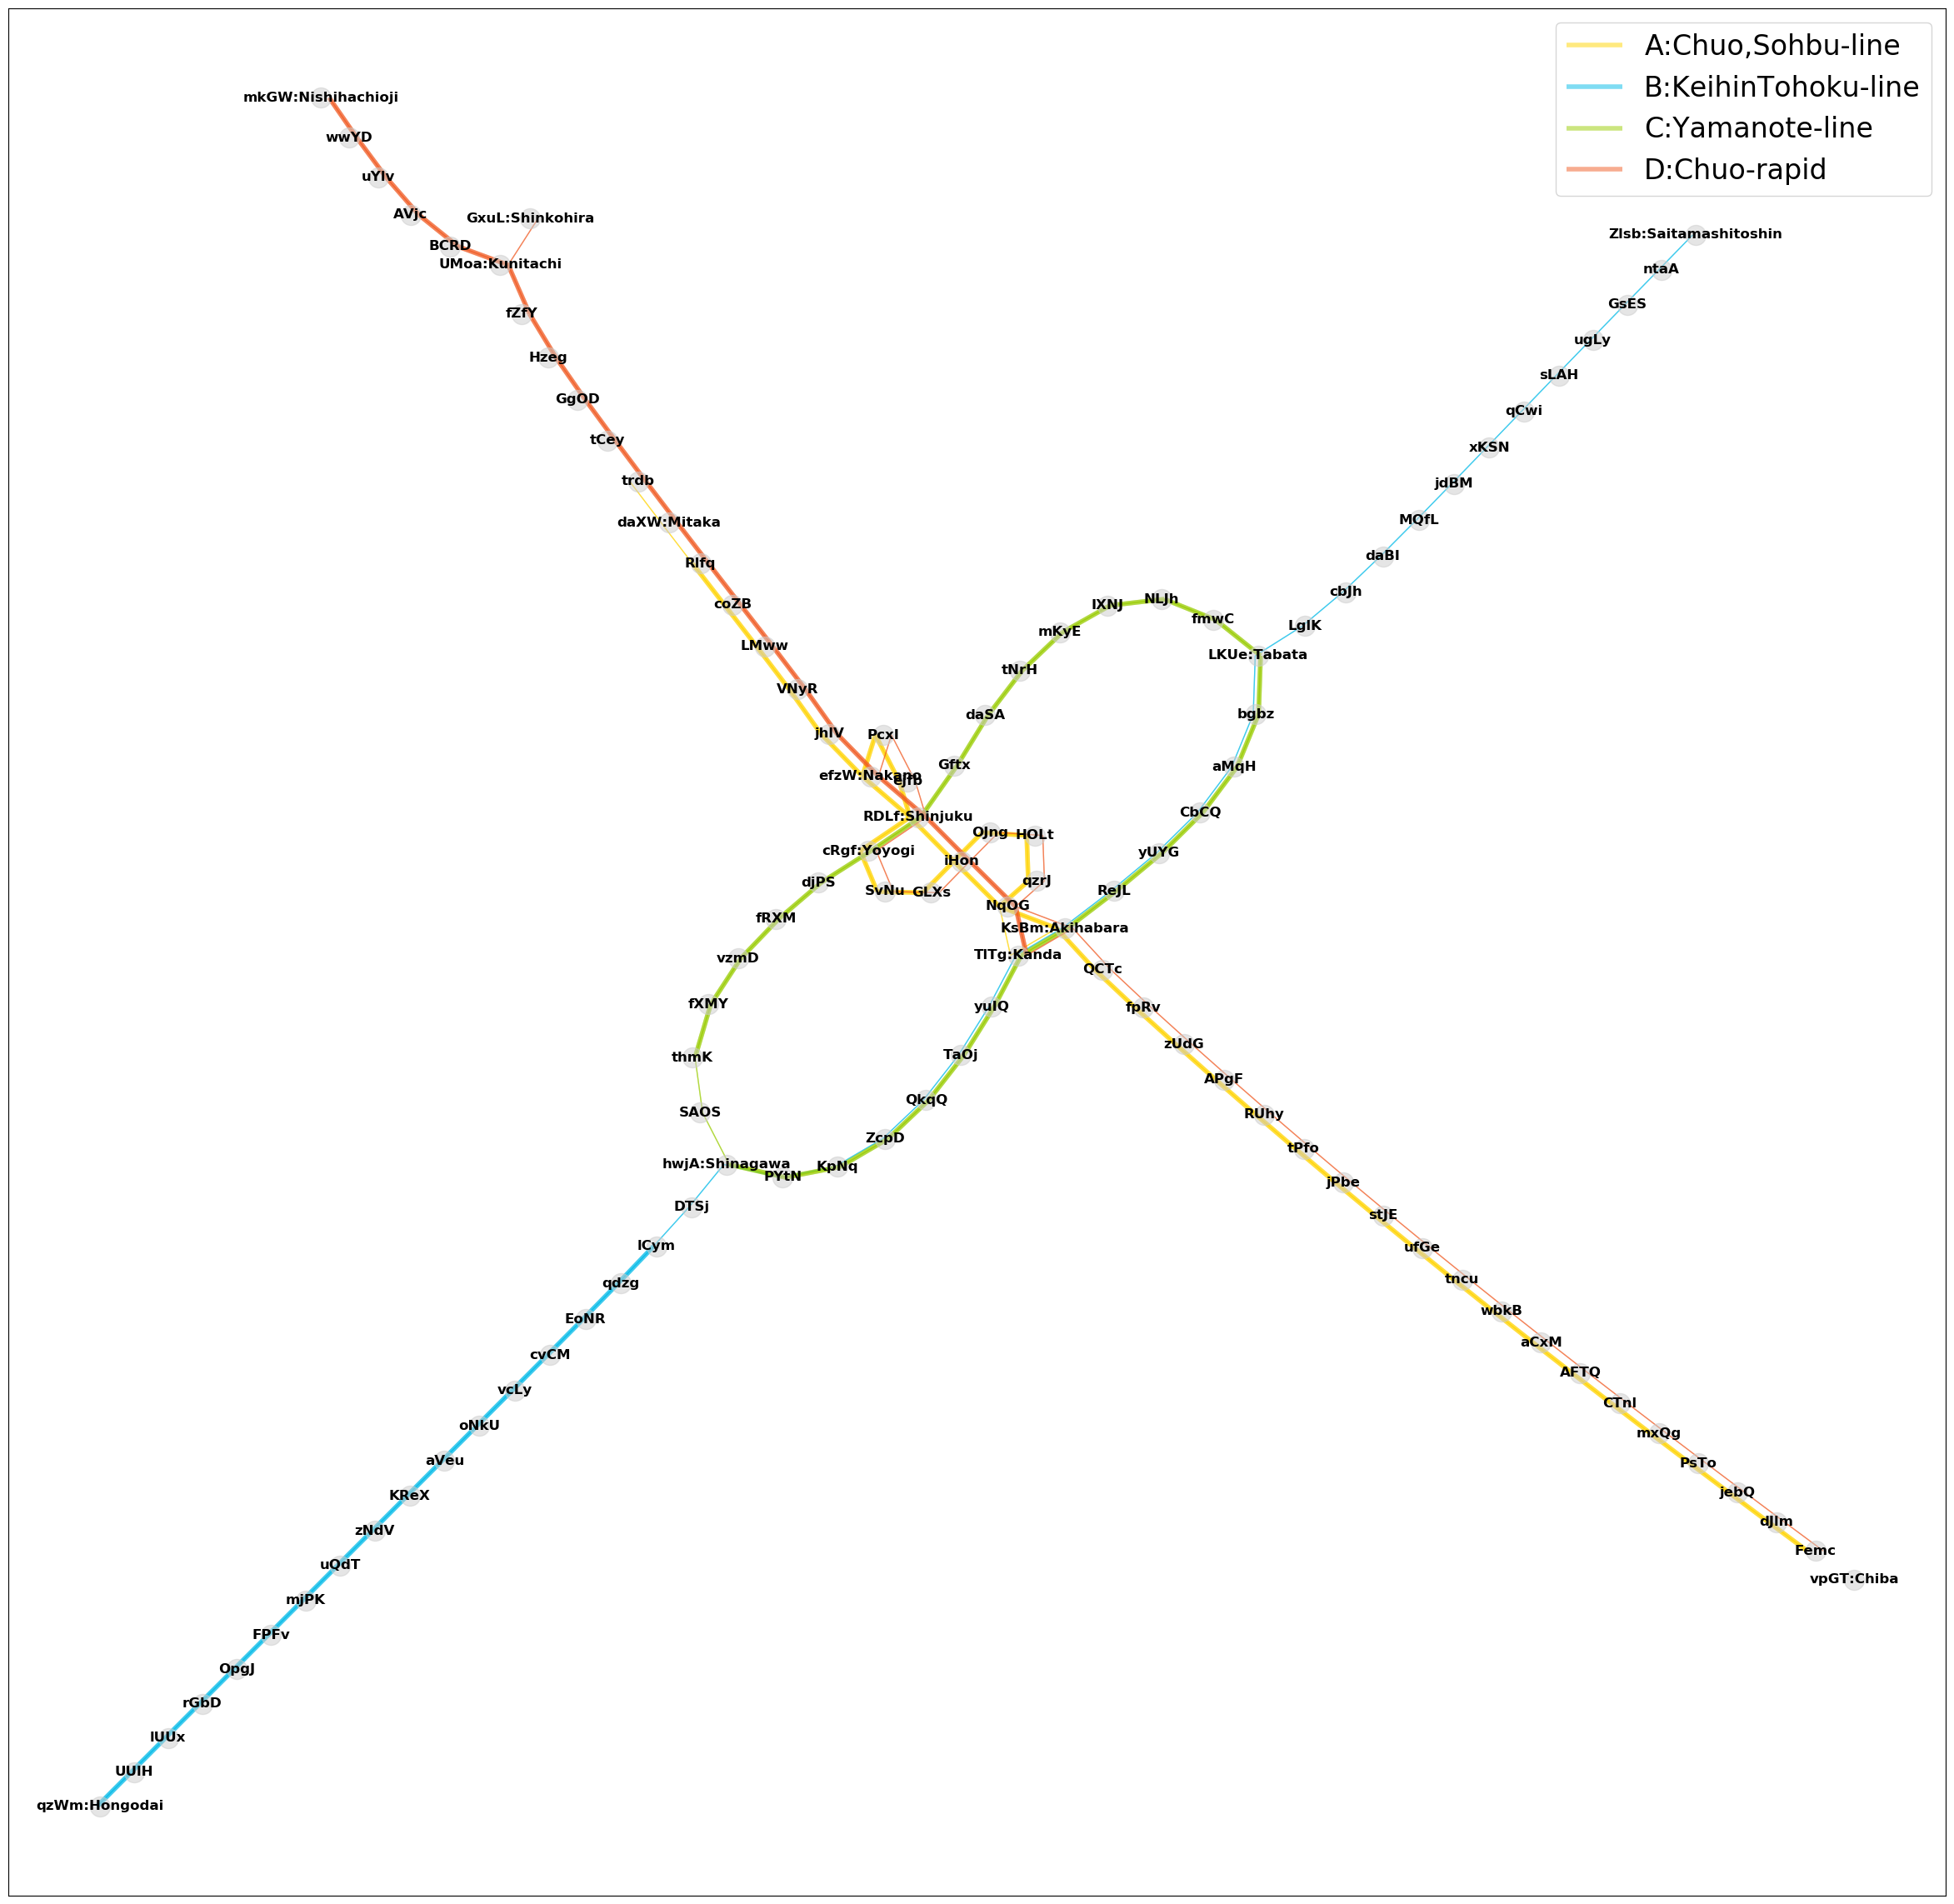

In [56]:
line_names_jp = ['Chuo,Sohbu-line', "KeihinTohoku-line", "Yamanote-line", "Chuo-rapid"]
colors = ["#ffd400", "#00bae8", "#99cc00", "#f15a22"]
station_dec = {
    "efzW": "Nakano",
    "KsBm": "Akihabara",
    "LKUe": "Tabata",
    "RDLf": "Shinjuku",
    "cRgf": "Yoyogi",
    "hwjA": "Shinagawa",
    "Zlsb": "Saitamashitoshin",
    "daXW": "Mitaka",
    "vpGT": "Chiba",
    "TlTg": "Kanda",
    "qzWm": "Hongodai",
    "mkGW": "Nishihachioji",
    "UMoa": "Kunitachi",
    "GxuL": "Shinkohira",
}

plt.figure(figsize=(30,30), dpi=100)

nx.draw_networkx_nodes(G, pos, node_color="#cccccc", alpha=0.5, node_size=300)  # ノードの描画
G_relabeled = nx.relabel_nodes(G, lambda x: f"{x}:{station_dec[x]}" if x in station_dec else x)
for k, v in station_dec.items():
    pos[f"{k}:{v}"] = pos[k]
nx.draw_networkx_labels(G_relabeled, pos, fontsize=6, font_family="Yu Gothic", font_weight="bold")  # 駅名の描画

for i, (line_name, line_name_jp, color) in enumerate(zip("ABCD", line_names_jp, colors)):
    p = {k: [v[0]+(i-1.5)*0.006, v[1]] for k, v in pos.items()}  # 複数の路線が重なって描画されないように適当にずらす
    
    g_all = G.subgraph(train_df[(train_df["lineName"]==line_name)]["stopStation"].unique())  # train 内で停車した駅での誘導部分グラフ
    nx.draw_networkx_edges(g_all, p, alpha=0.5, edge_color=color, width=1, arrows=False)  # 細線で描画
    
    g = G.subgraph(test_df[(test_df["lineName"]==line_name) & (test_df["target"]==1)]["stopStation"].unique())  # 予測対象の駅での誘導部分グラフ
    nx.draw_networkx_edges(g, p, alpha=0.5, edge_color=color, width=4, arrows=False, label=f"{line_name}:{line_name_jp}")  # 太線で描画
    
plt.legend(prop={"family": "Yu Gothic", "size": 24})

In [49]:
import pandas as pd
import numpy as np
import datetime 
from pathlib import Path

import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import xgboost as xgb 
import lightgbm as lgb 

DATA_DIR = Path('./data/input')

train = pd.read_csv(DATA_DIR / 'train.csv')
test = pd.read_csv(DATA_DIR / 'test.csv')
info = pd.read_csv(DATA_DIR / 'info.csv')
network = pd.read_csv(DATA_DIR / 'network.csv')

train_df = train.copy()
test_df = test.copy()
info_df = info.copy()
network_df = network.copy()


train_df['mark'] = 'train'
test_df['mark'] = 'test'

In [50]:
a = train_df.copy()

In [197]:
#データは何日分なのか
d = train_df['date'].value_counts().reset_index()
d.columns = ['date', 'count']
d = d.sort_values('date', ascending=True).reset_index(drop=True)

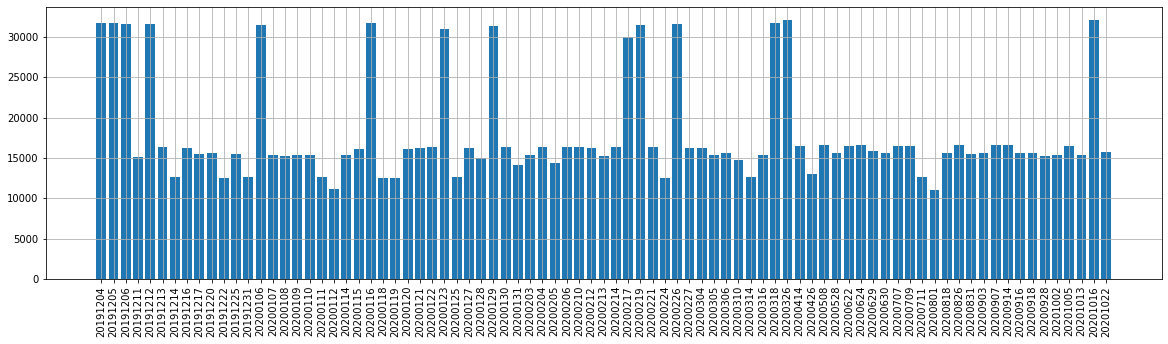

In [201]:
#日付ごとのデータの数の分布
d['date'] = list(map(lambda x: str(x), d['date']))

plt.figure(figsize=(20, 5))
plt.bar(d['date'], d['count'])
plt.xticks(rotation=90)
plt.grid()

In [199]:
#データは何日分なのか
d_ = test_df['date'].value_counts().reset_index()
d_.columns = ['date', 'count']
d_ = d_.sort_values('date', ascending=True).reset_index(drop=True)

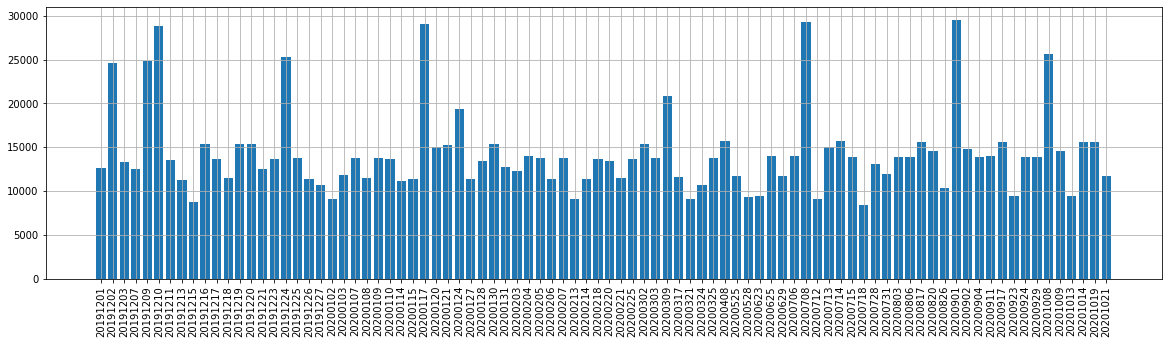

In [202]:
# 日付ごとのデータの数の分布
d_['date'] = list(map(lambda x: str(x), d_['date']))

plt.figure(figsize=(20, 5))
plt.bar(d_['date'], d_['count'])
plt.xticks(rotation=90)
plt.grid()

In [51]:
a_ = np.arange(0, len(train_df), len(train_df) // 4)
b_ = np.arange(0, len(train_df))

a['period'] = a_
a.head()

ValueError: Length of values does not match length of index

In [141]:
# ------------------------------------------------
# データ前処理
# ------------------------------------------------

def lgb_process(train_df, test_df):

    # 時間関連
    # 年度と月は一律だからあまり関係ない → 日付ごとで取得
    # date_hourから日付
    all_data = pd.concat([train_df, test_df], axis=0)
    all_data['date_day'] = abs(all_data['date']) % 100


    # planArrivalのminutesを除外，hoursを取得
    all_data['planArrival'] = pd.to_datetime(all_data['planArrival'], format='%H:%M')
    all_data['plan_hour'] = all_data['planArrival'].dt.hour


    # 訓練データとテストデータの分割
    train_df_ = all_data[all_data['mark'] == 'train']
    train_df_ = train_df_.drop(columns=['date', 'planArrival', 'target'])

    test_df_ = all_data[all_data['mark'] == 'test']
    test_df_ = test_df_.drop(columns=['date', 'planArrival'])
    return train_df_, test_df_

In [142]:
train_df_, test_df_ = lgb_process(train_df, test_df)

In [148]:
test_df_.head()

,id,lineName,directionCode,trainNo,stopStation,delayTime,mark,target,date_day,plan_hour
0,1488885,A,1,AqTAbk,Rlfq,0.0,test,0.0,1,17
1,1488886,A,1,AqTAbk,coZB,0.0,test,0.0,1,17
2,1488887,A,1,AqTAbk,LMww,0.0,test,0.0,1,17
3,1488888,A,1,AqTAbk,VNyR,0.0,test,0.0,1,17
4,1488889,A,1,AqTAbk,jhlV,0.0,test,0.0,1,17


In [149]:
# 路線情報追加
def line_process(train_df, test_df):

    all_data = pd.concat([train_df, test_df], axis=0)


    #中央総武線データ
    Chuo_Sohbu_dict = {}
    Chuo_Sohbu_list = [
        'Rlfq', 'coZB', 'LMww', 'VNyR', 'jhlV', 'efzW', 'PcxI', 'ejfb'
        ,'RDLf', 'cRgf', 'SvNu', 'GLXs', 'iHon', 'OJng', 'HOLt', 'qzrJ'
        ,'NqOG', 'KsBm', 'QCTc', 'fpRv', 'zUdG', 'APgF', 'RUhy', 'tPfo'
        ,'jPbe', 'stJE', 'ufGe', 'tncu', 'wbkB', 'aCxM', 'AFTQ', 'CTnl'
        ,'mxQg', 'PsTo', 'jebQ', 'dJlm', 'Femc', 'TlTg', 'daXW', 'trdb'
    ]
    A_val = 'A'
    Chuo_Sohbu_dict = { i : A_val for i in Chuo_Sohbu_list }


    #京浜東北線データ
    keihin_dict = {}
    keihin_list = [
        'FPFv', 'mjPK', 'uQdT', 'zNdV', 'KReX', 'aVeu', 'oNkU', 'vcLy'
        ,'cvCM', 'EoNR', 'qdzg', 'lCym', 'DTSj', 'hwjA', 'KpNq', 'ZcpD'
        ,'QkqQ', 'TaOj', 'yuIQ', 'TlTg', 'KsBm', 'ReJL', 'yUYG', 'CbCQ'
        ,'aMqH', 'bgbz', 'LKUe', 'LglK', 'cbJh', 'daBI', 'MQfL', 'jdBM'
        ,'xKSN', 'qCwi', 'sLAH', 'ugLy', 'GsES', 'ntaA', 'Zlsb', 'qzWm'
        ,'UUlH', 'lUUx', 'rGbD', 'OpgJ', 'PYtN'
    ]
    B_val = 'B'
    keihin_dict = { i : B_val for i in keihin_list }


    #山手線データ
    yamanote_dict = {}
    yamanote_list = [
        'hwjA', 'KpNq', 'ZcpD', 'QkqQ', 'TaOj', 'yuIQ', 'TlTg', 'KsBm'
        ,'ReJL', 'yUYG', 'CbCQ', 'aMqH', 'bgbz', 'LKUe', 'fmwC', 'NLJh'
        ,'IXNJ', 'mKyE', 'tNrH', 'daSA', 'Gftx', 'RDLf', 'cRgf', 'djPS'
        ,'fRXM', 'vzmD', 'fXMY', 'SAOS', 'thmK', 'PYtN'
    ]  
    C_val = 'C'
    yamanote_dict = { i : C_val for i in yamanote_list}


    #中央快速線データ
    Chuo_Rapid_dict = {}
    Chuo_Rapid_list = [
        'uYlv', 'AVjc', 'BCRD', 'mkGW', 'UMoa', 'fZfY', 'Hzeg', 'GgOD'
        ,'tCey', 'trdb', 'daXW', 'Rlfq', 'coZB', 'LMww', 'VNyR', 'jhlV'
        ,'efzW', 'RDLf', 'iHon', 'NqOG', 'TlTg', 'wwYD', 'PcxI', 'ejfb'
        ,'cRgf', 'SvNu', 'GLXs', 'OJng', 'HOLt', 'qzrJ', 'KsBm', 'QCTc'
        ,'fpRv', 'zUdG', 'APgF', 'RUhy', 'tPfo', 'jPbe', 'stJE', 'ufGe'
        ,'tncu', 'wbkB', 'aCxM', 'AFTQ', 'CTnl', 'mxQg', 'PsTo', 'jebQ'
        ,'dJlm', 'Femc', 'GxuL'
    ]
    D_val = 'D'
    Chuo_Rapid_dict = { i : D_val for i in Chuo_Rapid_list}


    #特徴量生成
    all_data['lineName_ChuoSpohbu'] = all_data['stopStation'].map(Chuo_Sohbu_dict)
    all_data['lineName_ChuoSpohbu'] = all_data['lineName_ChuoSpohbu'].fillna('0')

    all_data['lineName_Keihin'] = all_data['stopStation'].map(keihin_dict)
    all_data['lineName_Keihin'] = all_data['lineName_Keihin'].fillna('0')

    all_data['lineName_yamanote'] = all_data['stopStation'].map(yamanote_dict)
    all_data['lineName_yamanote'] = all_data['lineName_yamanote'].fillna('0')

    all_data['lineName_ChuoRapid'] = all_data['stopStation'].map(Chuo_Rapid_dict)
    all_data['lineName_ChuoRapid'] = all_data['lineName_ChuoRapid'].fillna('0')



    # 訓練データとテストデータの分割
    train_df_ = all_data[all_data['mark'] == 'train']
    train_df_ = train_df_.drop(columns=['mark', 'target'])

    test_df_ = all_data[all_data['mark'] == 'test']
    test_df_ = test_df_.drop(columns=['mark'])
    return train_df_, test_df_


In [150]:
train_df_, test_df_ = line_process(train_df_, test_df_)

In [159]:
#test_df_.head()

In [152]:
# 隣接駅の取得
def station_process(train_df, test_df, network_df):
    #訓練データの停車駅を取得
    all_stopStation = list(pd.unique(train_df['stopStation']))
    to_dct = {}

    for s in all_stopStation:
        to_lst = []
        for i in range(len(network_df)):
            if network_df['station1'].iloc[i] == s:
                to_lst.append(network_df['station2'].iloc[i])
            if network_df['station2'].iloc[i] == s:
                to_lst.append(network_df['station1'].iloc[i])
        to_dct[s] = to_lst

    # stopStationに対する隣接駅を表すデータフレーム
    connect_station_col = [
        'stopStation'
        ,'conn1'
        ,'conn2'
        ,'conn3'
        ,'conn4'
        ,'conn5'
        ,'numOfConn'
    ]
    connect_station_df = pd.DataFrame(None, columns=connect_station_col)

    connect_station_df['stopStation'] = all_stopStation
    cols = ['conn1', 'conn2', 'conn3', 'conn4', 'conn5']
    for i in range(len(connect_station_df)):
        s = connect_station_df['stopStation'].iloc[i]
        idx = len(to_dct[s])
        for j in range(idx):
            connect_station_df[cols[j]].iloc[i] = to_dct[s][j]
        connect_station_df['numOfConn'].iloc[i] = len(to_dct[s])

    for col in cols:
        connect_station_df[col] = connect_station_df[col].fillna('0')

    train_connect_df = train_df.merge(connect_station_df)
    test_connect_df = test_df.merge(connect_station_df)

    train_connect_df['numOfConn'] = train_connect_df['numOfConn'].astype(int)
    test_connect_df['numOfConn'] = test_connect_df['numOfConn'].astype(int)

    return train_connect_df, test_connect_df

In [153]:
train_df_, test_df_ = station_process(train_df_, test_df_, network_df)

In [158]:
#train_df_.head()

In [92]:
#test_df.head()

In [162]:
#ラベルエンコーディング
def label_preprocess(train_df, test_df):

    train_x = train_df.drop(['delayTime'], axis=1)
    train_y = train_df['delayTime']
    
    test_df = test_df[test_df['target'] == 1]
    test_x  = test_df.drop(['delayTime', 'target'], axis=1)
    test_y  = test_df['delayTime']

    cat_cols = [
        'lineName', 'trainNo', 'stopStation'
        , 'lineName_ChuoSpohbu', 'lineName_Keihin', 'lineName_yamanote', 'lineName_ChuoRapid'
        ,'conn1', 'conn2', 'conn3', 'conn4', 'conn5'
    ]
    
    for c in cat_cols:
        le = LabelEncoder()
        le.fit(train_x[c])
        train_x[c] = le.transform(train_x[c])
        
        le.fit(test_x[c])
        test_x[c] = le.transform(test_x[c])

    return train_x, train_y, test_x, test_y

In [163]:
train_x, train_y, test_x, test_y = label_preprocess(train_df_, test_df_)

In [164]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488885 entries, 0 to 1488884
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   id                   1488885 non-null  int64
 1   lineName             1488885 non-null  int64
 2   directionCode        1488885 non-null  int64
 3   trainNo              1488885 non-null  int64
 4   stopStation          1488885 non-null  int64
 5   date_day             1488885 non-null  int64
 6   plan_hour            1488885 non-null  int64
 7   lineName_ChuoSpohbu  1488885 non-null  int64
 8   lineName_Keihin      1488885 non-null  int64
 9   lineName_yamanote    1488885 non-null  int64
 10  lineName_ChuoRapid   1488885 non-null  int64
 11  conn1                1488885 non-null  int64
 12  conn2                1488885 non-null  int64
 13  conn3                1488885 non-null  int64
 14  conn4                1488885 non-null  int64
 15  conn5                1488885 non

In [165]:
# ------------------------------------------------------
# lightgbmの実装
# ------------------------------------------------------
import pandas as pd 
import xgboost as xgb 
import lightgbm as lgb 


train_x_ = train_x.copy()
train_y_ = train_y.copy()
test_x_ = test_x.copy()
test_y_ = test_y.copy()


lgb_train = lgb.Dataset(train_x_, label=train_y_)
lgb_eval  = lgb.Dataset(test_x_, label=test_y_)

params_lgb = {
    'silent':1
    , 'random_state':71
    , 'objective':'regression_l1'
    , 'max_depth':5
    , 'early_stopping_rounds':500
}

num_round = 20 

model_lgb = lgb.train(
    params_lgb
    ,lgb_train
    ,valid_sets=lgb_eval
    ,num_boost_round=10000
    ,early_stopping_rounds=100
    ,verbose_eval=50
)

#va_pred = model_lgb.predict(test_x_)
#print(f'mean absolute score:{score:.4f}')

Training until validation scores don't improve for 500 rounds
[50]	valid_0's l1: 0
[100]	valid_0's l1: 0
[150]	valid_0's l1: 0
[200]	valid_0's l1: 0
[250]	valid_0's l1: 0
[300]	valid_0's l1: 0
[350]	valid_0's l1: 0
[400]	valid_0's l1: 0
[450]	valid_0's l1: 0
[500]	valid_0's l1: 0
Early stopping, best iteration is:
[1]	valid_0's l1: 0


In [166]:
test_df_merge = test_df[['id', 'target']]

In [167]:
pred_data = pd.merge(test_x_, test_df_merge, on='id', how='left')
pred_data = pred_data[pred_data['target'] == 1]

In [168]:
va_pred = model_lgb.predict(pred_data)

In [169]:
test_df_merge = test_df_merge[test_df_merge['target'] == 1]

In [170]:
idx = test_df_merge['id'].reset_index(drop=True)
val = pd.Series(va_pred).reset_index(drop=True)
print(len(idx))
print(len(val))

123275
123275


In [171]:
submit_df = pd.concat([idx, val], axis=1)
submit_df.to_csv('./data/(2020-12-15_lgb_lineStation).csv', header=False, index=False)

In [172]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(train_df_.drop('delayTime',axis=1).columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(model_lgb.feature_importance()) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
#df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
#display(df_importance)
f_importance

array([0.4137931 , 0.17241379, 0.03448276, 0.        , 0.        ,
       0.06896552, 0.24137931, 0.03448276, 0.        , 0.        ,
       0.03448276, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [82]:
#train_df_

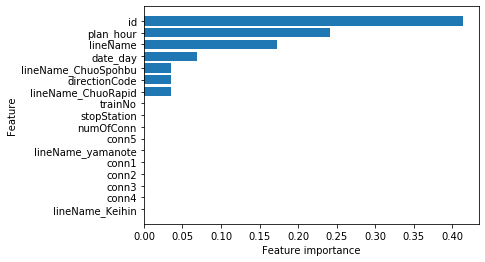

In [173]:
# 特徴量重要度の可視化
plot_feature_importance(df_importance)

In [38]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')     

In [37]:
import matplotlib.pyplot as plt 

In [174]:
# ---------------------------------------------------
# 学習データとテストデータをバリデーションで分ける
# ---------------------------------------------------
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]

tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]


# ------------------------------------------------------
# lightgbmの実装
# ------------------------------------------------------
import pandas as pd 
import xgboost as xgb 
import lightgbm as lgb 


train_x_ = train_x.copy()
train_y_ = train_y.copy()
test_x_ = test_x.copy()
test_y_ = test_y.copy()


lgb_train = lgb.Dataset(tr_x, tr_y)
lgb_eval  = lgb.Dataset(va_x, va_y)

params_xgb = {
    'silent':1
    , 'random_state':71
    , 'objective':'regression_l1'
    , 'max_depth':5
    , 'early_stopping_rounds':500
    }

num_round = 20 

model_lgb = lgb.train(
    params_xgb
    ,lgb_train
    ,valid_sets=lgb_eval
    ,num_boost_round=10000
    ,early_stopping_rounds=100
    ,verbose_eval=50
)

Training until validation scores don't improve for 500 rounds
[50]	valid_0's l1: 1.20359
[100]	valid_0's l1: 1.20359
[150]	valid_0's l1: 1.20359
[200]	valid_0's l1: 1.20359
[250]	valid_0's l1: 1.20359
[300]	valid_0's l1: 1.20359
[350]	valid_0's l1: 1.20359
[400]	valid_0's l1: 1.20359
[450]	valid_0's l1: 1.20359
[500]	valid_0's l1: 1.20359
Early stopping, best iteration is:
[12]	valid_0's l1: 1.20359


In [176]:
test_df_merge = test_df[['id', 'target']]

pred_data = pd.merge(tr_x, test_df_merge, on='id', how='left')
pred_data = pred_data[pred_data['target'] == 1]

In [178]:
#予測値を出力
va_pred = model_lgb.predict(pred_data)

ValueError: Input data must be 2 dimensional and non empty.